# Importing libraries 

In [4]:
import numpy as np
import tensorflow as tf

# Collaborative Filtering
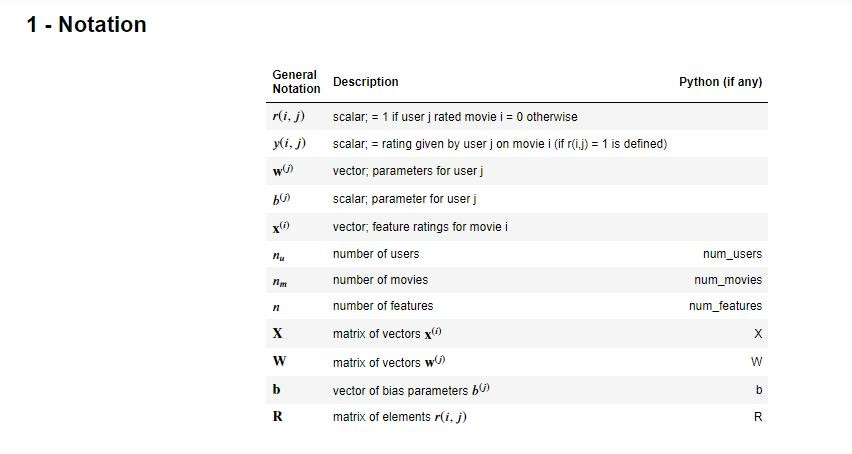

Cost Function


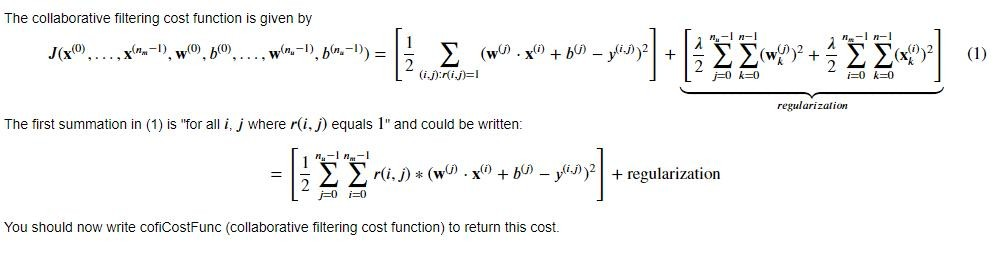

In [1]:
# GRADED FUNCTION: cofi_cost_func

def cofi_cost_func(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    nm, nu = Y.shape
    J = 0
 
    for j in range(nu):
        w = W[j,:]
        b_j = b[0,j]
        for i in range(nm):
            x = X[i,:]
            y = Y[i,j]
            r = R[i,j]
            J += np.square(r * (np.dot(w,x) + b_j - y ) ) 
    
    J = J/2
    J += ((lambda_/2) * (np.sum(np.square(W)) + np.sum(np.square(X))))

    return J

Vectorized Implementation

In [2]:
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Vectorized for speed. Uses tensorflow operations to be compatible with custom training loop.
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

Preparing Model

In [7]:
#  Useful Values
#num_movies, num_users = Y.shape
num_features = 100

# Set Initial Parameters (W, X), use tf.Variable to track these variables
tf.random.set_seed(1234) # for consistent results
#W = tf.Variable(tf.random.normal((num_users,  num_features),dtype=tf.float64),  name='W')
#X = tf.Variable(tf.random.normal((num_movies, num_features),dtype=tf.float64),  name='X')
#b = tf.Variable(tf.random.normal((1,          num_users),   dtype=tf.float64),  name='b')

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

Training the Collaborative Filtering Model

In [12]:
iterations = 200
lambda_ = 1
#for iter in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost 
    #with tf.GradientTape() as tape:

        # Compute the cost (forward pass included in cost)
        #cost_value = cofi_cost_func_v(X, W, b, Ynorm, R, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    #grads = tape.gradient( cost_value, [X,W,b] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    #optimizer.apply_gradients( zip(grads, [X,W,b]) )

    # Log periodically.
    #if iter % 20 == 0:
        #print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

# Content-Based Filtering

Neural Network for Content-Based Filtering


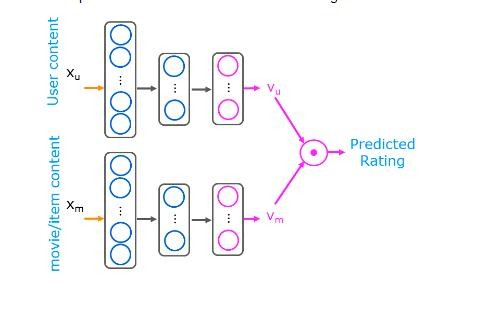

In [18]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
        
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units= num_outputs, activation = 'linear'),
  
])

item_NN = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units= num_outputs)
  
])

  # create the user input and point to the base network
#input_user = tf.keras.layers.Input(shape=(num_user_features))
#vu = user_NN(input_user)
#vu = tf.linalg.l2_normalize(vu, axis=1)

  # create the item input and point to the base network
#input_item = tf.keras.layers.Input(shape=(num_item_features))
#vm = item_NN(input_item)
#vm = tf.linalg.l2_normalize(vm, axis=1)

  # compute the dot product of the two vectors vu and vm
#output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
#model = tf.keras.Model([input_user, input_item], output)

#model.summary()

In [21]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#model.compile(optimizer=opt,
              #loss=cost_fn)

In [23]:
tf.random.set_seed(1)
#model.fit([user_train[:, u_s:], item_train[:, i_s:]], y_train, epochs=30)

Finding Similar Items

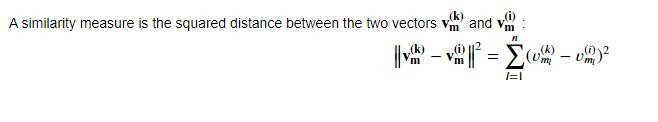

In [25]:
def sq_dist(a,b):
    """
    Returns the squared distance between two vectors
    Args:
      a (ndarray (n,)): vector with n features
      b (ndarray (n,)): vector with n features
    Returns:
      d (float) : distance
    """
    
    d = np.sum(np.square(a-b)) 
    
    return d